In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

s:\Workspace\langgraph\agentic-voyage-langgraph\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


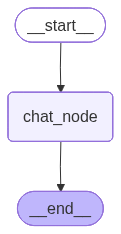

In [2]:
load_dotenv(override=True)

# Create a State
class State(BaseModel):
    messages: Annotated[list, add_messages]
    
# Create a StateGraph
graph_builder = StateGraph(State)

# Create a Node
def chat_node(old_state: State) -> State:
    messages = old_state.messages
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
    response = llm.invoke(messages)
    new_state = State(messages=[response])
    return new_state
    
# Add the Node to the Graph
graph_builder.add_node("chat_node", chat_node)

# Create Edges
graph_builder.add_edge(START, "chat_node")
graph_builder.add_edge("chat_node", END)

# Create a Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))





In [ ]:
from unittest import result


def chat(message, history):
    initial_state = State(messages=[{"role": "user", "content": message}])
    result=graph.invoke(initial_state)
    print(result)
    return result["messages"][-1].content

demo = gr.ChatInterface(chat,type="messages")

demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='c9ba814b-4898-4d05-829f-ded422cf35e9'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CNuHYKPI6boeSXuLEcgv07Sj0G3ok', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0f79c002-ded1-4a40-92d8-6c53d74d8bce-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='wha